Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 1: Regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić i Mladen Karan

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 11. listopada 2016.</i> 

Objavljeno: **12. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **17. listopada 2016.**

### Upute

Prva laboratorijska vježba sastoji se od **sedam** zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Univarijatna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([[4],[1],[2],[5]])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje dizajn-matrice $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
poly = skp.PolynomialFeatures(1)
DM = poly.fit_transform(X)
DM

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ dizajn-matrice, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

In [5]:
DMTranspose = DM.transpose()
DMMultiplication = np.dot(DMTranspose,DM)
Inverse = linalg.inv(DMMultiplication)
InverseTranspose = np.dot(Inverse,DMTranspose)
w = np.dot(InverseTranspose,y)
# w
pseudoInvers = linalg.pinv(DM)
w2 = np.dot(pseudoInvers,y)
w2

array([[ 2.2       ],
       [ 0.45714286]])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
D = np.append(X, y, axis=1)
#D
h = np.dot(w2.transpose(),DM.transpose())
error = mean_squared_error(y.transpose(),h)
error

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
linalg.inv(DM)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X,y) # sa fit dobijemo koeficijente koji predstavljaju w0, w1... točnije dobijemo hipotezu
w1coef = model.coef_ #koeficijenti hipoteze
w0coef = model.intercept_
print("Formula: {0}x + {1}".format(w1coef, w0coef))
hmodel = model.predict(X) #izračunava vrijednost hipoteze za svaki x (skup primjera)
errorRegression = mean_squared_error(y,hmodel) # racunanje greške 
if error == errorRegression:
    print("Greške su iste")

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal

In [9]:
def make_labels(X, f, noise=0) :
    functionOnX = f(X)
    s = np.random.normal(0, noise,size=X.shape)
    y = functionOnX + s
    return y

fx = np.poly1d([-5,-2,1,5])
X = np.linspace(-5,5)
sigma = 200
make_labels(X, fx, sigma)

array([ 761.18275804,  572.91479806,  608.71517403,  420.6737968 ,
        359.94849799,  229.22144881,  142.06210869,  331.14890276,
        -13.90732504,  -68.10199887, -122.93352619,   87.3205991 ,
        319.89843707, -407.58547121,  202.25168005, -118.49455092,
        114.23244637, -332.77335335, -190.37847295,  -17.26149926,
         41.47775519,  310.98345278,  150.62042861,   55.68887639,
         11.83732562,  119.33237187, -399.6827896 ,  253.02574108,
          5.73538396,  402.91428222, -150.13568763,   39.1974776 ,
        -56.19357569,  -36.40180025,   56.60129491,   -3.58835822,
       -199.0150805 , -138.83267494, -153.53984733,  -76.9548118 ,
       -648.16851846, -155.81129274, -214.40994853,  -58.69263733,
       -575.20411233, -589.08988658, -275.94099016, -397.48531243,
       -337.80820481, -546.86616232])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

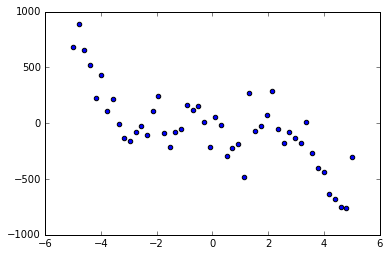

In [10]:
fx = np.poly1d([-5,-2,1,5])
X = np.linspace(-5,5)
sigma = 200
y = make_labels(X, fx, sigma)
plt.scatter(X,y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

[ -4.7469605    2.32432193  -0.48809728 -19.79705477]


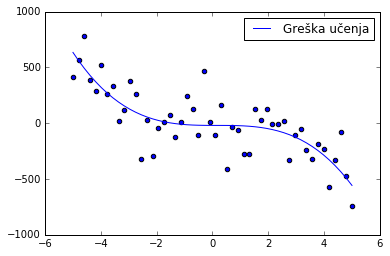

32665.3115492


In [319]:
fx = np.poly1d([-5,-2,1,5])
X = np.linspace(-5,5)
sigma = 200
y = make_labels(X, fx, sigma) #stvarne vrijesnosti, naučeni model
ytrain_polynomal = sp.polyfit(X,y,3)
print(ytrain_polynomal)
#ytrain = fx(X)
plt.scatter(X,y);
plt.plot(X, sp.polyval(ytrain_polynomal,X),label="Greška učenja")
legend()
plt.show()
error = mean_squared_error(y,sp.polyval(ytrain_polynomal,X))
print(error)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

d=1: error= 42024.084629628414
d=3: error= 32665.31154920912
d=5: error= 32629.368703455697
d=10: error=25770.061964184926
d=20: error=18195.59273753802


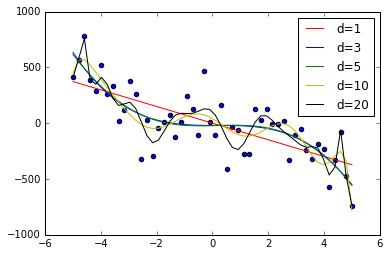

In [320]:
sigma = 200

y1train_p = sp.polyfit(X,y,1)
error_1 = mean_squared_error(y, sp.polyval(y1train_p,X))

y3train_p = sp.polyfit(X,y,3)
error_3 = mean_squared_error(y,sp.polyval(y3train_p,X))

y5train_p = sp.polyfit(X,y,5)
error_5 = mean_squared_error(y,sp.polyval(y5train_p,X))

y10train_p = sp.polyfit(X,y,10)
error_10 = mean_squared_error(y,sp.polyval(y10train_p,X))

y20train_p = sp.polyfit(X,y,20)
error_20 = mean_squared_error(y,sp.polyval(y20train_p,X))

print("d=1: error= {0}\nd=3: error= {1}\nd=5: error= {2}\nd=10: error={3}\nd=20: error={4}".format(error_1,error_3,error_5,error_10,error_20))

plt.scatter(X,y)
plt.plot(X,sp.polyval(y1train_p,X),"r",label="d=1");
plt.plot(X,sp.polyval(y3train_p,X),"b",label="d=3")
plt.plot(X,sp.polyval(y5train_p,X),"g",label="d=5")
plt.plot(X,sp.polyval(y10train_p,X),"y",label="d=10")
plt.plot(X,sp.polyval(y20train_p,X),"k",label="d=20")
legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in\{1,20\}$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [13]:
from sklearn import cross_validation

[ 10.95645823  10.84938562  10.37516335  10.36725021  10.35001548
  10.28457644  10.24303691  10.2348549   10.07836853  10.07258365
  10.04099653  10.00648404   9.96658664   9.76415538   9.6657832
   9.66577449   9.61629641   9.42584527   9.39382383   9.31861378]
[ 10.24193331  10.57986339  10.79139906  10.80072371  10.80603043
  10.69002045  10.75332909  10.70915334  10.78585299  10.78484138
  10.3748377   11.27713571  12.05508505  14.32526925  14.36252586
  14.34799304  15.1682018   18.78115223  17.92216268  21.37824639]


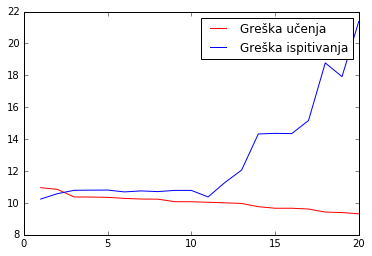

In [322]:
X = linspace(-5,5)
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.5)
learning_error_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
testing_error_array =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(1,21):
    ytrain_p = sp.polyfit(x_train,y_train,i)
    error_learning = mean_squared_error(y_train, sp.polyval(ytrain_p,x_train))
    learning_error_array[i-1]=math.log(error_learning)
    ypredicted = sp.polyval(ytrain_p,x_test)
    error_testing = mean_squared_error(y_test, ypredicted);
    testing_error_array[i-1]=math.log(error_testing)
    # print("d={0}\ngreška učenja: {1}\nispitna greška: {2}\n".format(i,error_learning,error_testing))
    
learning = np.asarray(learning_error_array)
print(learning)
testing = np.asarray(testing_error_array)
print(testing)
complexity = np.arange(1,21)
plt.plot(complexity,learning,"r",label="Greška učenja")
plt.plot(complexity,testing,"b",label="Greška ispitivanja")
legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

C:\Users\Lovro\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lovro\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lovro\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Lovro\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


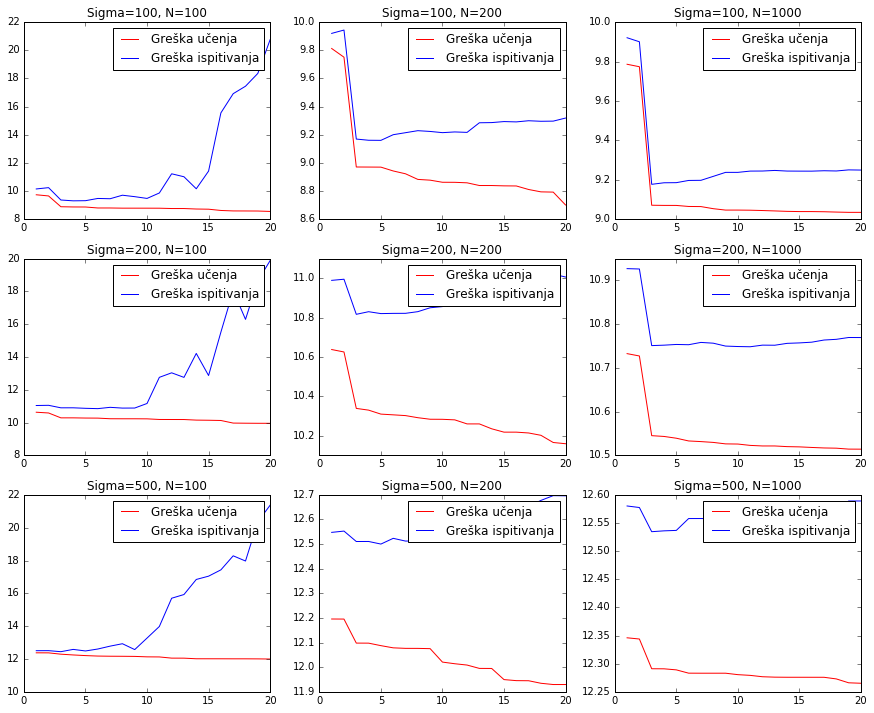

In [324]:
plt.figure(figsize=(15,12))
X = np.linspace(-5,5,1000)
fx = np.poly1d([-5,-2,1,5])
noise = [100,200,500]
N = [100,200,1000]
x_train_500, x_test_500 = cross_validation.train_test_split(X, test_size=0.5)#x za treniranje i x za ucenje
x_train = []
x_test = []
y_train = []
y_test = []
counter = 331
def calculateErrorDrawGrapf(sigma,N,x_train, x_test, y_train, y_test):
    for i in range(1,21):
        ytrain_p = sp.polyfit(x_train,y_train,i)
        error_learning = mean_squared_error(y_train, sp.polyval(ytrain_p,x_train))
        learning_error_array[i-1]=math.log(error_learning)
        ypredicted = sp.polyval(ytrain_p,x_test)
        error_testing = mean_squared_error(y_test, ypredicted);
        testing_error_array[i-1]=math.log(error_testing)
        # print("d={0}\ngreška učenja: {1}\nispitna greška: {2}\n".format(i,error_learning,error_testing))
        
    learning = np.asarray(learning_error_array)
    testing = np.asarray(testing_error_array)
    complexity = np.arange(1,21)
    plt.subplot(counter)
    plt.plot(complexity, learning,"r",label="Greška učenja")
    plt.plot(complexity, testing,"b",label="Greška ispitivanja")
    plt.title('Sigma={0}, N={1}'.format(sigma,N))
    legend()
      
for sigma in noise: #za svaki šum
    y_train_sigma = make_labels(x_train_500, fx, sigma)#y za treniranje
    y_test_sigma = make_labels(x_test_500, fx, sigma)#y za test
    for exampleNumber in N:
        x_train = [];x_test=[];y_train=[];y_test=[]
        x_train.append(x_train_500[::1000/exampleNumber])
        x_test.append(x_test_500[::1000/exampleNumber]) 
        y_train.append(y_train_sigma[::1000/exampleNumber])
        y_test.append(y_test_sigma[::1000/exampleNumber])
        x_train_ar = np.asarray(x_train)
        x_train_array = np.asarray(x_train)[0]
        y_train_array = np.asarray(y_train)[0]
        x_test_array = np.asarray(x_test)[0]
        y_test_array = np.asarray(y_test)[0]
        calculateErrorDrawGrapf(sigma,exampleNumber,x_train_array,x_test_array,y_train_array,y_test_array)
        counter+=1

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
X = np.array([[0],[1],[2],[4]])
y = np.array([[4],[1],[2],[5]])
poly = skp.PolynomialFeatures(3)
DM = poly.fit_transform(X)
DMTranspose = DM.transpose()
DMMultiplication = np.dot(DMTranspose,DM)
rows_I = DMMultiplication.shape[0]
cols_I = DMMultiplication.shape[1]
identityMatrix = np.identity(rows_I)
lambdas = [0,1,10]
for lamb in lambdas:
    identityMatrixLambda = identityMatrix*lamb
    sum = DMMultiplication + identityMatrixLambda
    DMMultiplicationSumInvers = linalg.inv(sum)
    InverseTranspose = np.dot(DMMultiplicationSumInvers,DMTranspose)
    wlambda = np.dot(InverseTranspose,y)
    print("lambda={0}, w={1}\n\n".format(lamb,wlambda))

lambda=0, w=[[ 4.        ]
 [-5.91666667]
 [ 3.375     ]
 [-0.45833333]]


lambda=1, w=[[ 1.79567372]
 [-0.24729075]
 [-0.0175289 ]
 [ 0.07014758]]


lambda=10, w=[[ 0.43312265]
 [ 0.11060671]
 [ 0.13827839]
 [ 0.03093411]]




### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge

In [18]:
for lamb in lambdas:
    clf = Ridge(alpha=lamb)
    clf.fit(DM, y) 
    print("Lambda:{0}, Coef: {1}, intercept: {2}".format(lamb, clf.coef_, clf.intercept_))

Lambda:0, Coef: [[ 0.         -5.91666667  3.375      -0.45833333]], intercept: [ 4.]
Lambda:1, Coef: [[ 0.         -0.69079365 -0.2831746   0.1445805 ]], intercept: [ 3.05696145]
Lambda:10, Coef: [[ 0.         -0.15897295 -0.13423067  0.0815601 ]], intercept: [ 2.49444184]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

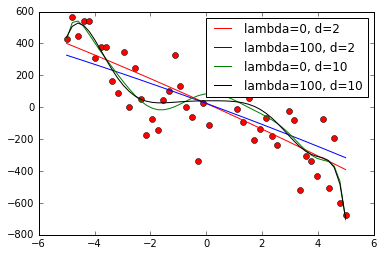

In [325]:
from sklearn.pipeline import make_pipeline
X = linspace(-5,5,50)
fx = np.poly1d([-5,-2,1,5])
sigma = 200
y = make_labels(X, fx, sigma) #stvarne vrijesnosti, naučeni model
lambdas = [0,100]
plt.plot(X,y,"ro")
X = X.reshape(50,1)
colors = ["r","b"]
i = 0
for lamb in lambdas:
    ridge_model = Ridge(alpha=lamb)
    model = make_pipeline(skp.PolynomialFeatures(2, include_bias=False), ridge_model)
    model.fit(X,y)
    predicted_values = model.predict(X)
    plt.plot(X,predicted_values,colors[i],label="lambda={:d}, d={:d}".format(lamb,2))
    i+=1
    
colors = ["g","k"]
i = 0
for lamb in lambdas:
    ridge_model = Ridge(alpha=lamb)
    model = make_pipeline(skp.PolynomialFeatures(10), ridge_model)
    model.fit(X,y)
    predicted_values = model.predict(X)
    plt.plot(X,predicted_values,colors[i],label="lambda={:d}, d={:d}".format(lamb,10))
    i+=1
    
legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti a kojoj podnaučenosti. Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


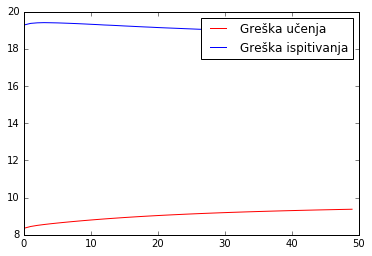

In [76]:
X = linspace(-5,5)
fx = np.poly1d([-5,-2,1,5])
sigma = 200
y = make_labels(X, fx, sigma) #stvarne vrijesnosti, naučeni model
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.5)
x_train = x_train.reshape(25,1)
y_train = y_train.reshape(25,1)
x_test = x_test.reshape(25,1)
y_test = y_test.reshape(25,1)
learning_error_array = [0] * 50
testing_error_array =  [0] * 50
lambdas_list = range(0,51)
for i in range(0,51):
    ridge_model = Ridge(alpha=i)
    model = make_pipeline(skp.PolynomialFeatures(20), ridge_model)
    model.fit(x_train,y_train)
    error_learning = mean_squared_error(y_train,model.predict(x_train))
    learning_error_array[i-1]=math.log(error_learning)
    error_testing = mean_squared_error(y_test,model.predict(x_test))
    testing_error_array[i-1]=math.log(error_testing)

    #print("d={0}\ngreška učenja: {1}\nispitna greška: {2}\n".format(i,error_learning,error_testing))
    
learning = np.asarray(learning_error_array)
testing = np.asarray(testing_error_array)
lambdas_array = np.arange(0,50)
plt.plot(lambdas_array,learning,"r",label="Greška učenja")
plt.plot(lambdas_array,testing,"b",label="Greška ispitivanja")
legend()
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije:

In [60]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

19


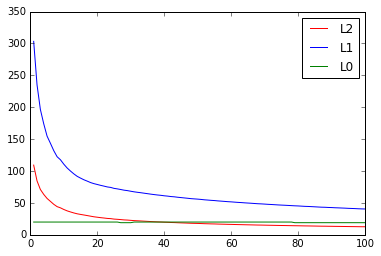

In [306]:
from sklearn import linear_model
X = linspace(-5,5)
fx = np.poly1d([-5,-2,1,5])
sigma = 200
y = make_labels(X, fx, sigma) #stvarne vrijesnosti, naučeni model
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.5)
x_train = x_train.reshape(25,1)
y_train = y_train.reshape(25,1)
x_test = x_test.reshape(25,1)
y_test = y_test.reshape(25,1)
L2 = []
L1 = []
L0 = []
for i in range(1,101):
    ridge_model = Ridge(alpha=i)
    model = make_pipeline(skp.PolynomialFeatures(20), ridge_model)
    model.fit(x_train,y_train)
    L2_norm = np.linalg.norm(ridge_model.coef_[0], ord=2)
    L1_norm = np.linalg.norm(ridge_model.coef_[0], ord=1)
    L0_norm = nonzeroes(ridge_model.coef_[0])
    if(i==100):
        print(L0_norm)
    L2.append(L2_norm)
    L1.append(L1_norm)
    L0.append(L0_norm)

lambdas = arange(1,101)
L2_a = np.asarray(L2)
L1_a = np.asarray(L1)
L0_a = np.asarray(L0)
plt.plot(lambdas,L2_a,"r",label="L2")
plt.plot(lambdas,L1_a,"b",label="L1")
plt.plot(lambdas,L0_a,"g",label="L0")
legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Users\Lovro\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


10


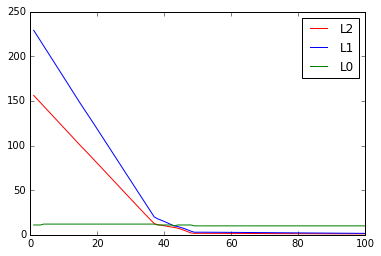

In [326]:
from sklearn import linear_model
X = linspace(-5,5)
fx = np.poly1d([-5,-2,1,5])
sigma = 200
y = make_labels(X, fx, sigma) #stvarne vrijesnosti, naučeni model
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.5)
x_train = x_train.reshape(25,1)
y_train = y_train.reshape(25,1)
x_test = x_test.reshape(25,1)
y_test = y_test.reshape(25,1)
L2 = []
L1 = []
L0 = []
for i in range(1,101):
    lasso_model =  linear_model.Lasso(alpha=i)
    model = make_pipeline(skp.PolynomialFeatures(20), lasso_model)
    model.fit(x_train,y_train)
    L2_norm = np.linalg.norm(lasso_model.coef_, ord=2)
    L1_norm = np.linalg.norm(lasso_model.coef_, ord=1)
    L0_norm = nonzeroes(lasso_model.coef_)
    L2.append(L2_norm)
    L1.append(L1_norm)
    L0.append(L0_norm)
    if i==100:
        print(L0_norm)
        
lambdas = arange(1,101)
L2_a = np.asarray(L2)
L1_a = np.asarray(L1)
L0_a = np.asarray(L0)
plt.plot(lambdas,L2_a,"r",label="L2")
plt.plot(lambdas,L1_a,"b",label="L1")
plt.plot(lambdas,L0_a,"g",label="L0")
legend()
plt.show()

### 7. Predviđanje cijena nekretnina u Bostonu

Do sada smo razmatrali isključivo univarijatnu regresiju, tj. imali smo samo jednu značajku ($n=1$). U većini stvarnih problema baratamo s većim brojem značajki. Razmotrimo sada jedan nešto realniji problem, kod kojega postoji više značajki, pa je potrebno napraviti multivarijatnu regresiju.

Učitajte skup podataka *Boston House Prices*:

In [189]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


Skup sadrži 506 primjera sa 13 numeričkih značajki. Opis skupa možete dobiti na sljedeći način:

In [191]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### (a)

Vaš je zadatak da izgradite regresijski model za predviđanje cijene nekretnine (`y=boston.target`) na temelju 13 raspoloživih značajki za svaku nekretninu (`X=boston.data`). Cilj je pronaći najbolji mogući linearni model regresije na ovom skupu podataka i provjeriti njegovu točnost u smislu pogreške kvadratnog odstupanja ([`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)). 

Hiperparametri modela koje treba isprobati su:

* **Regularizacija:** Bez regularizacije ([`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)), L2-regularizacija ([`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) i L1-regularizacija ([`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso));
* **Značajke:** Izvornih 13 značajki, polinomijalne značajke (isprobajte različite stupnjeve polinoma $d$), samo interakcijske značajke (opcija `interaction_only` u klasi [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html));

Kao i inače, za odabir i ispitivanje modela koristit ćemo **unakrsnu provjeru** (engl. *cross-validation*). Skup primjera za učenje podijelit ćemo na **skup za učenje**, **skup za provjeru** i **skup za ispitivanje** u omjeru (otprilike) 3:1:1. Kao u uvijek, model trebate trenirati na skupu za učenje, odabir modela (odnosno optimizaciju hiperparametra) trebate provesti na skupu za provjeru, a konačno vrednovanje modela trebate načiniti na skupu za ispitivanje. Konačno vrednovanje radite samo jednom, za model koji ste na skupu za provjeru odabrali kao optimalan.

**NB:** Nakon što odaberete optimalan model na skupu za provjeru, prije konačnog ispitivanja odabrani model ponovno trenirajte na uniji skupova za učenje i provjeru. Na taj način iskorištavate maksimalno iskorištavate dostupne podatke i model će u pravilu biti bolji.

Podjela na skup za učenje, provjeru i ispitivanje u ovom je slučaju fiksna kako bi svi imali identične skupove i kako bi rezultati bili usporedivi. (U stvarnosti biste ovakav eksperiment radili malo drugačije: koristili biste višestruku unakrsnu provjeru ili ugnježđenu unakrsnu provjeru. Više o tome u budućim vježbama.) 

Koristite sljedeće skupove:

In [315]:
from sklearn import cross_validation
X_train, X_rest, y_train, y_rest = cross_validation.train_test_split(boston.data,boston.target,train_size=0.6,random_state=42)
X_validate, X_test, y_validate, y_test = cross_validation.train_test_split(X_rest,y_rest,test_size=0.5,random_state=42)
print(X_train.shape, X_validate.shape ,X_test.shape)

(303, 13) (101, 13) (102, 13)


In [316]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#Linearna regresija
print("LINEARNA REGRESIJA")
poly = skp.PolynomialFeatures(2,interaction_only=True)
X_train_transform = poly.fit_transform(X_train)
X_validate_transform = poly.fit_transform(X_validate)
X_test_transform = poly.fit_transform(X_test)

linear_model = LinearRegression().fit(X_train_transform,y_train)
y_predicted = linear_model.predict(X_train_transform)
linear_learning_error = mean_squared_error(y_train,y_predicted)
print("Greška ucenja: {0}".format(linear_learning_error))

y_predicted_test = linear_model.predict(X_test_transform)
linear_testing_error = mean_squared_error(y_test,y_predicted_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(linear_testing_error))

linear_model = LinearRegression().fit(X_validate_transform,y_validate)
y_validate_predict = linear_model.predict(X_validate_transform)
linear_validate_error = mean_squared_error(y_validate,y_validate_predict)
print("Greška skupa za provjeru optimizacije modela: {0}".format(linear_validate_error))

#spajanje skupa primjera za ucenje i skupa primjera za provjeru
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
x_train_validate_transform = poly.fit_transform(x_train_validate)
y_train_validate = np.append(y_train,y_validate)
linear_model = LinearRegression().fit(x_train_validate_transform,y_train_validate)
y_test_combined = linear_model.predict(X_test_transform)
linear_test_combined_error = mean_squared_error(y_test,y_test_combined)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(linear_test_combined_error))

#L1-norma

print("\nL1-norma")
lasso_model = sklearn.linear_model.Lasso(alpha=4)
model = make_pipeline(skp.PolynomialFeatures(3,interaction_only=True), lasso_model)
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
print("Greška učenja: {0}".format(mean_squared_error(y_train,y_train_predict)))
y_validate_predict = model.predict(X_validate)
print("Greška skupa za provjeru optimizacije modela: {0}".format(mean_squared_error(y_validate,y_validate_predict)))
y_test_predict = model.predict(X_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(mean_squared_error(y_test,y_test_predict)))
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
model.fit(x_train_validate,y_train_validate)
y_predict_train_validate_test = model.predict(X_test)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(mean_squared_error(y_test,y_predict_train_validate_test)))


#L2-norma

print("\nL2-norma")
ridge_model = Ridge(alpha=0)
model = make_pipeline(skp.PolynomialFeatures(2,interaction_only=True), ridge_model)
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
print("Greška učenja: {0}".format(mean_squared_error(y_train,y_train_predict)))
y_validate_predict = model.predict(X_validate)
print("Greška skupa za provjeru optimizacije modela: {0}".format(mean_squared_error(y_validate,y_validate_predict)))
y_test_predict = model.predict(X_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(mean_squared_error(y_test,y_test_predict)))
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
model.fit(x_train_validate,y_train_validate)
y_predict_train_validate_test = model.predict(X_test)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(mean_squared_error(y_test,y_predict_train_validate_test)))

LINEARNA REGRESIJA
Greška ucenja: 8.084601979695108
Greška ispitivanja na skupu za ispitivanje: 23.13710125983009
Greška skupa za provjeru optimizacije modela: 4.2896640566915565
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 16.818299111936565

L1-norma
Greška učenja: 4.3066638983969225
Greška skupa za provjeru optimizacije modela: 12.952455543624435
Greška ispitivanja na skupu za ispitivanje: 13.73416070344111
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 13.303175409971834

L2-norma
Greška učenja: 4.883901503487696
Greška skupa za provjeru optimizacije modela: 24.800020830303847
Greška ispitivanja na skupu za ispitivanje: 15.068497360992113
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 12.470389973540373


C:\Users\Lovro\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


**Q:** Koliko značajki ima svaki od modela koji ste isprobali?

**Q:** Provjerite točnost odabranog modela na (1) skupu za učenje, (2) skupu za provjeru, (3) uniji ta dva skupa i (4) skupu za ispitivanje. Jesu li odnosi između točnosti modela na ova četiri skupa očekivana? Obrazložite.

**Q:** Kod treniranja regresijskog modela moguće je postaviti `fit_intercept=False`, čime se izbjegava optimiranje težine $w_0$. Trenirajte odabrani model s tom postavkom. Usporedite s točnošću optimalnog modela. Je li rezultat očekivan? Obrazložite. Ima li predobrada značajki ikakvog utjecaja na ovu razliku?

In [317]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#Linearna regresija
print("LINEARNA REGRESIJA")
poly = skp.PolynomialFeatures(2,interaction_only=True)
X_train_transform = poly.fit_transform(X_train)
X_validate_transform = poly.fit_transform(X_validate)
X_test_transform = poly.fit_transform(X_test)

linear_model = LinearRegression().fit(X_train_transform,y_train)
y_predicted = linear_model.predict(X_train_transform)
linear_learning_error = mean_squared_error(y_train,y_predicted)
print("Greška ucenja: {0}".format(linear_learning_error))

y_predicted_test = linear_model.predict(X_test_transform)
linear_testing_error = mean_squared_error(y_test,y_predicted_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(linear_testing_error))

linear_model = LinearRegression(fit_intercept=False).fit(X_validate_transform,y_validate)
y_validate_predict = linear_model.predict(X_validate_transform)
linear_validate_error = mean_squared_error(y_validate,y_validate_predict)
print("Greška skupa za provjeru optimizacije modela: {0}".format(linear_validate_error))

#spajanje skupa primjera za ucenje i skupa primjera za provjeru
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
x_train_validate_transform = poly.fit_transform(x_train_validate)
y_train_validate = np.append(y_train,y_validate)
linear_model = LinearRegression().fit(x_train_validate_transform,y_train_validate)
y_test_combined = linear_model.predict(X_test_transform)
linear_test_combined_error = mean_squared_error(y_test,y_test_combined)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(linear_test_combined_error))

#L1-norma

print("\nL1-norma")
lasso_model = sklearn.linear_model.Lasso(alpha=4)
model = make_pipeline(skp.PolynomialFeatures(3,interaction_only=True), lasso_model)
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
print("Greška učenja: {0}".format(mean_squared_error(y_train,y_train_predict)))
y_validate_predict = model.predict(X_validate)
print("Greška skupa za provjeru optimizacije modela: {0}".format(mean_squared_error(y_validate,y_validate_predict)))
y_test_predict = model.predict(X_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(mean_squared_error(y_test,y_test_predict)))
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
model.fit(x_train_validate,y_train_validate)
y_predict_train_validate_test = model.predict(X_test)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(mean_squared_error(y_test,y_predict_train_validate_test)))


#L2-norma

print("\nL2-norma")
ridge_model = Ridge(alpha=0)
model = make_pipeline(skp.PolynomialFeatures(2,interaction_only=True), ridge_model)
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
print("Greška učenja: {0}".format(mean_squared_error(y_train,y_train_predict)))
y_validate_predict = model.predict(X_validate)
print("Greška skupa za provjeru optimizacije modela: {0}".format(mean_squared_error(y_validate,y_validate_predict)))
y_test_predict = model.predict(X_test)
print("Greška ispitivanja na skupu za ispitivanje: {0}".format(mean_squared_error(y_test,y_test_predict)))
x_train_validate = np.append(X_train,X_validate,axis=0)
y_train_validate = np.append(y_train,y_validate,axis=0)
model.fit(x_train_validate,y_train_validate)
y_predict_train_validate_test = model.predict(X_test)
print("Greška ispitivanja unije skupa za ucenje i skupa za provjeru: {0}".format(mean_squared_error(y_test,y_predict_train_validate_test)))

LINEARNA REGRESIJA
Greška ucenja: 8.084601979695108
Greška ispitivanja na skupu za ispitivanje: 23.13710125983009
Greška skupa za provjeru optimizacije modela: 0.6373661986269464
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 16.818299111936565

L1-norma
Greška učenja: 4.3066638983969225
Greška skupa za provjeru optimizacije modela: 12.952455543624435
Greška ispitivanja na skupu za ispitivanje: 13.73416070344111
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 13.303175409971834

L2-norma
Greška učenja: 4.883901503487696
Greška skupa za provjeru optimizacije modela: 24.800020830303847
Greška ispitivanja na skupu za ispitivanje: 15.068497360992113
Greška ispitivanja unije skupa za ucenje i skupa za provjeru: 12.470389973540373


C:\Users\Lovro\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
